## **Data Analysis with Titanic Dataset**

Let's do some simple data analysis & cleansing. The data we are working with is Titanic Dataset. You can read more [here](https://www.kaggle.com/competitions/titanic/data)

In this notebook we 
work with CSV files
Impute missing values
Identify & remove outliers

Let's take a look at what data we have here

## DaraFrame



*   A data structure in the Python programming language
*   used to store and manipulate tabular 2D data



In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.__version__

'1.5.3'

## Data Preparation ##

In [35]:
titanic_df = pd.read_csv('train.csv')

In [36]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
titanic_df.shape

(891, 12)

In [38]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
titanic_df =  titanic_df.replace(regex=r'[,]', value='')
titanic_df['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)

In [46]:
titanic_df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [47]:
titanic_df[['Survived', 'Pclass']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [48]:
titanic_df[['Survived', 'Sex']].groupby('Sex').mean()

,Survived
Sex,
0,0.188908
1,0.742038


## Outliers

In [13]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [49]:
uppper_boundary=titanic_df['Age'].mean() + 1.5* titanic_df['Age'].std()
lower_boundary=titanic_df['Age'].mean() - 1.5* titanic_df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(titanic_df['Age'].mean())

7.909371648557759
51.48886364555988
29.69911764705882


(None, None, None)

In [50]:
uppper_boundary=titanic_df['Age'].mean() + 3* titanic_df['Age'].std()
lower_boundary=titanic_df['Age'].mean() - 3* titanic_df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(titanic_df['Age'].mean())

-13.880374349943303
73.27860964406094
29.69911764705882


(None, None, None)

In [51]:
titanic_df.loc[titanic_df['Age']>=73,'Age']=73


In [17]:
titanic_df.corr()

<ipython-input-17-6b0fd17af2c0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_df.corr()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036311,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.078151,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369230,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.092897,0.114631,0.245489,0.182333
Age,0.036311,-0.078151,-0.369230,-0.092897,1.000000,-0.308584,-0.189196,0.096414
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308584,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189196,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096414,0.159651,0.216225,1.000000


## Nulls

There are a lot of different ways to handle null values.


Drop any records that contain nulls

1.   Drop any records that contain nulls
2.   If data is numerical: Replace them with mean/median/zero/etc
3.   If data is categorival: eplace them with the mode


There are many nulls in the Cabin. Let's get rid of those rows where any of that column is null, so this is the simplest approach for the time being.

In [18]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
titanic_df.dropna(subset =['Cabin'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,Cumings Mrs. John Bradley (Florence Briggs Tha...,1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,Futrelle Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,McCarthy Mr. Timothy J,0,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,Sandstrom Miss. Marguerite Rut,1,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,Bonnell Miss. Elizabeth,1,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,Beckwith Mrs. Richard Leonard (Sallie Monypeny),1,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,Carlsson Mr. Frans Olof,0,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,Potter Mrs. Thomas Jr (Lily Alexenia Wilson),1,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,Graham Miss. Margaret Edith,1,19.0,0,0,112053,30.0000,B42,S


In [20]:
new_titanic_df= titanic_df[['Survived',	'Pclass',	'Sex','Age',	'SibSp',	'Parch'	]]

In [21]:
new_titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [22]:
no_null_df = new_titanic_df.fillna(new_titanic_df.mean()['Age'])


In [23]:
no_null_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [24]:
no_null_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


## Plotting packages in Python




1.   matplotlib

      *   Data visualization libraries in Python
      *   Provides a lot of flexibility and customization options
      *   Requires more coding and configuration to create visualizations

2.   seaborn

      * Provide out-of-the-box visualizations with less customization options

      * Ease of use and attractive default styles.
      * Has specialized functions for creating statistical visualizations, such as heatmaps, regression plots, and distribution plots.

Matplotlib is a more mature library, with a large community and extensive documentation


Pandas has plotting functions available for plots on Series and DataFrame objects. These plotting functions are built based on matplotlib.





In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='Pclass', ylabel='Age'>

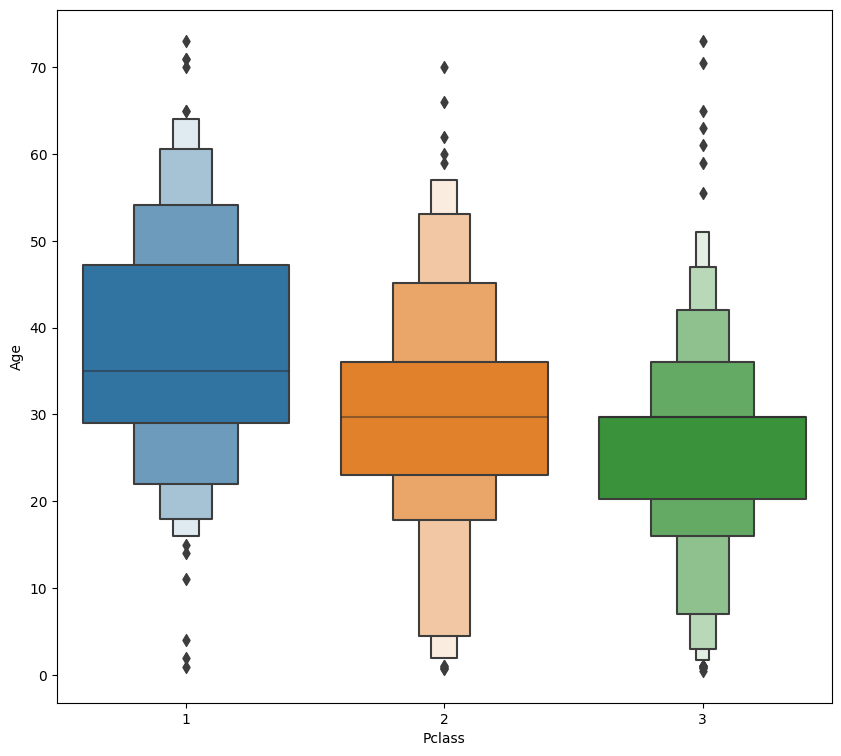

In [27]:
plt.figure(figsize=(10,9))
sns.boxenplot(x= 'Pclass', y ='Age', data=no_null_df)


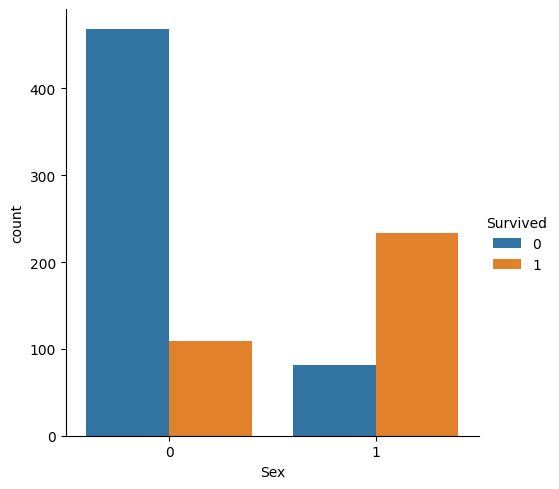

In [28]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = no_null_df)

<Axes: >

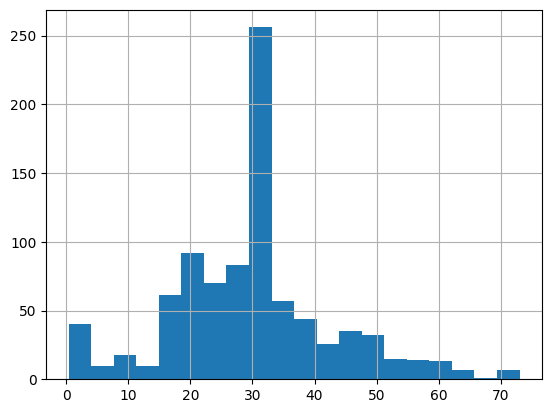

In [29]:
no_null_df.Age.hist(bins=20)

<ipython-input-30-39872de896b2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(no_null_df['Age']),bins=100)


<Axes: xlabel='Age', ylabel='Density'>

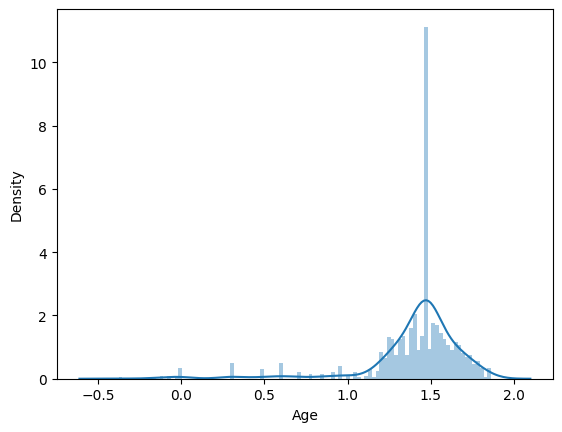

In [30]:
sns.distplot(np.log10(no_null_df['Age']),bins=100)

<Axes: ylabel='Sex'>

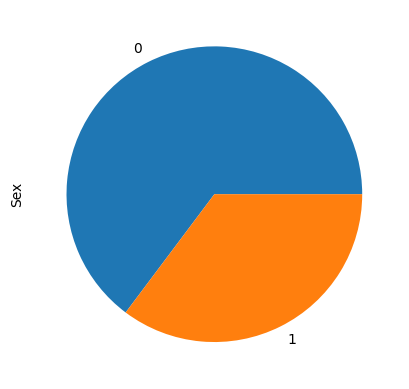

In [31]:
no_null_df['Sex'].value_counts().plot(kind='pie')

In [32]:
min(no_null_df['Age'])

0.42